In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
ds = pd.read_csv("datasets/dataset.csv")
ds.head()

,id_task,application_type,creation_date,completion_date,time_compute (s),time_env (s),time_dl (s),time_up (s),mobo_uuid,qrad_uuid,qbox_uuid,cpu_name,nb_cores,status,dataset,dataset_size,node_id
0,12,3DRender,2021-01-26 23:21:37,2021-01-26 23:23:19,0,91,2,0,4F424F4D-ADF0-084E-AC68-00D861156ABF,44415251-ADF0-084E-AC68-000000000000,584f4251-4000-0000-1001-000000000004,AMD Ryzen 7 2700X Eight-Core Processor,8,Preempted,ds320,80,3
1,13,3DRender,2021-01-26 23:21:37,2021-01-26 23:23:19,0,91,2,0,4F424F4D-ADF0-084E-AC68-00D8611555D3,44415251-ADF0-084E-AC68-000000000000,584f4251-4000-0000-1001-000000000004,AMD Ryzen 7 2700X Eight-Core Processor,8,Preempted,ds473,75,0
2,14,3DRender,2021-01-26 23:21:37,2021-01-26 23:24:29,103,63,4,1,4F424F4D-58D8-00D7-B155-00D8617B5DDC,44415251-58D8-00D7-B155-000000000000,584f4251-2001-0000-0000-000000000002,AMD Ryzen 7 2700 Eight-Core Processor,8,Completed,ds411,117,1
3,20,3DRender,2021-01-26 23:21:37,2021-01-26 23:24:46,121,61,4,1,4F424F4D-58D8-01D7-3AB5-00D861C8FAE7,44415251-58D8-01D7-3AB5-000000000000,584f4251-3000-0000-2000-000000000002,AMD Ryzen 7 2700 Eight-Core Processor,8,Completed,ds760,95,0
4,21,3DRender,2021-01-26 23:21:37,2021-01-26 23:24:46,122,61,4,1,4F424F4D-58D8-01D7-3AB5-00D861C8FC14,44415251-58D8-01D7-3AB5-000000000000,584f4251-3000-0000-2000-000000000002,AMD Ryzen 7 2700 Eight-Core Processor,8,Completed,ds378,152,0


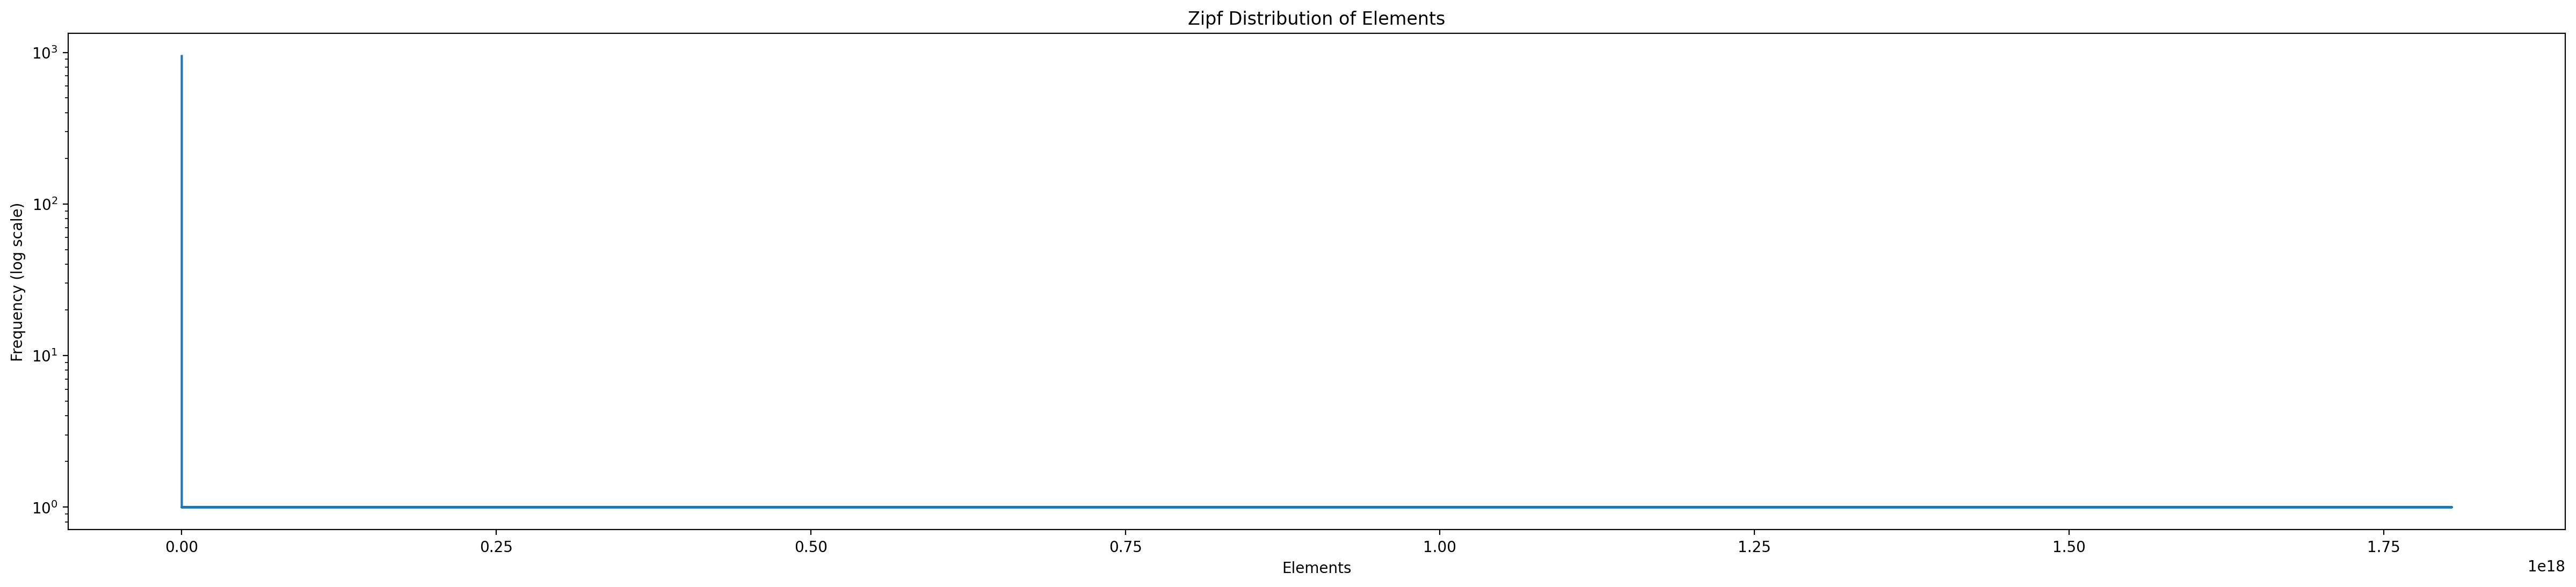

In [33]:
plt.figure(figsize=(30, 6), dpi=200) 
zipf_indices = np.random.zipf(1.2, 5000)
element_counts = pd.Series(zipf_indices).value_counts()
element_counts.plot(kind='line', logy=True, title='Zipf Distribution of Elements')
plt.xlabel('Elements')
plt.ylabel('Frequency (log scale)')
plt.show()

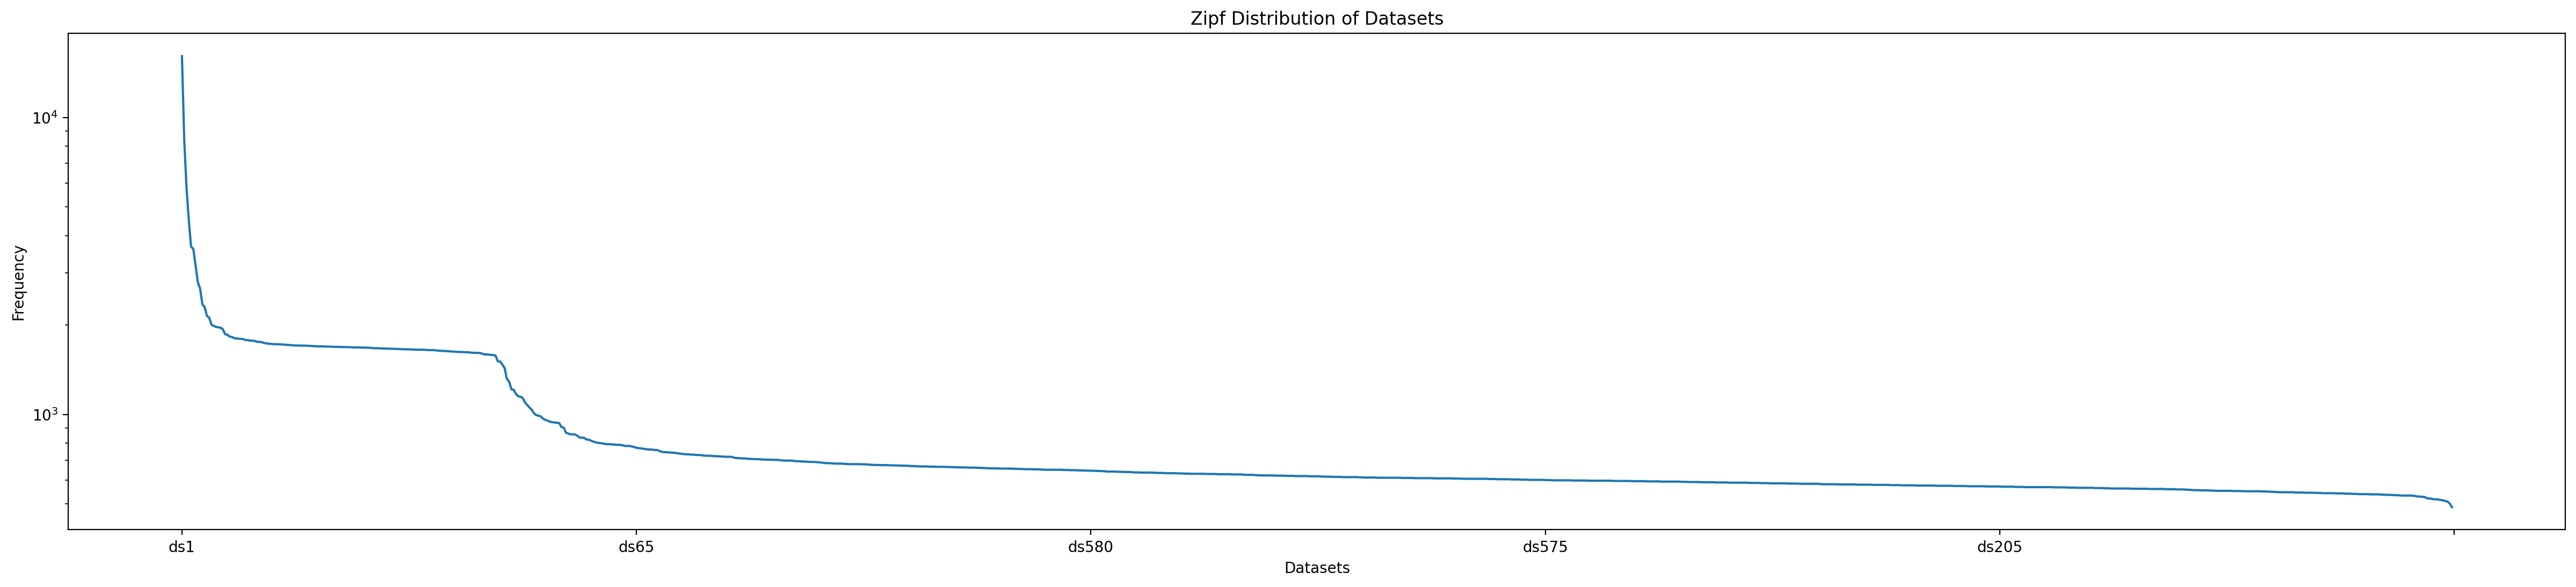

In [29]:
plt.figure(figsize=(30, 6), dpi=200)  # Set a higher DPI for better quality
element_counts = pd.Series(ds["dataset"]).value_counts()
element_counts.plot(kind='line', logy=True, title='Zipf Distribution of Datasets')
plt.xlabel('Datasets')
plt.ylabel('Frequency')
plt.show()

In [5]:
datasets = [(row["dataset"], row["dataset_size"]) for i, row in ds.iterrows()]
unique_datasets = [(str(x[0]),int(x[1])) for x in np.unique(datasets, axis=0)]
unique_datasets

[('ds0', 241),
 ('ds1', 139),
 ('ds10', 141),
 ('ds100', 63),
 ('ds101', 136),
 ('ds102', 216),
 ('ds103', 77),
 ('ds104', 126),
 ('ds105', 15),
 ('ds106', 109),
 ('ds107', 168),
 ('ds108', 147),
 ('ds109', 77),
 ('ds11', 102),
 ('ds110', 172),
 ('ds111', 103),
 ('ds112', 218),
 ('ds113', 220),
 ('ds114', 150),
 ('ds115', 237),
 ('ds116', 169),
 ('ds117', 58),
 ('ds118', 41),
 ('ds119', 180),
 ('ds12', 249),
 ('ds120', 238),
 ('ds121', 105),
 ('ds122', 158),
 ('ds123', 118),
 ('ds124', 171),
 ('ds125', 15),
 ('ds126', 164),
 ('ds127', 241),
 ('ds128', 173),
 ('ds129', 186),
 ('ds13', 116),
 ('ds130', 244),
 ('ds131', 85),
 ('ds132', 240),
 ('ds133', 176),
 ('ds134', 193),
 ('ds135', 127),
 ('ds136', 96),
 ('ds137', 136),
 ('ds138', 241),
 ('ds139', 238),
 ('ds14', 170),
 ('ds140', 94),
 ('ds141', 179),
 ('ds142', 215),
 ('ds143', 100),
 ('ds144', 70),
 ('ds145', 236),
 ('ds146', 240),
 ('ds147', 225),
 ('ds148', 144),
 ('ds149', 239),
 ('ds15', 238),
 ('ds150', 65),
 ('ds151', 103),
 (

In [6]:
sum = 0
for item in unique_datasets:
    sum += item[1]
sum

129440

In [7]:
ds['dataset_size'].describe()

count    821132.000000
mean        130.832507
std          72.348651
min           1.000000
25%          71.000000
50%         130.000000
75%         196.000000
max         254.000000
Name: dataset_size, dtype: float64

In [25]:
# Get unique values and their counts
unique_values, counts = np.unique(ds['dataset'], return_counts=True)

# Create a DataFrame from the unique values and counts
frequency = pd.DataFrame({'Dataset': unique_values, 'Frequency': counts})
frequency["Frequency"].describe()

count     1000.000000
mean       821.132000
std        710.635452
min        487.000000
25%        579.000000
50%        619.000000
75%        708.250000
max      16081.000000
Name: Frequency, dtype: float64

In [26]:
ds.describe()

,id_task,time_compute (s),time_env (s),time_dl (s),time_up (s),nb_cores,dataset_size,node_id
count,8.211320e+05,8.211320e+05,821132.000000,821132.000000,821132.000000,821132.000000,821132.000000,821132.000000
mean,1.778269e+06,1.584451e+04,96.084991,42.151116,21.053877,12.404880,130.832507,1.498483
std,1.098173e+06,7.612653e+04,860.349085,231.977573,375.063312,8.618378,72.348651,1.117468
min,1.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000
25%,7.963978e+05,2.700000e+01,1.000000,1.000000,1.000000,8.000000,71.000000,0.000000
50%,1.666302e+06,1.570000e+02,91.000000,1.000000,1.000000,8.000000,130.000000,1.000000
75%,2.734870e+06,7.300000e+02,131.000000,16.000000,2.000000,8.000000,196.000000,2.000000
max,3.672301e+06,1.920725e+06,772945.000000,13834.000000,18120.000000,32.000000,254.000000,3.000000
